In [1]:
from polyglot.text import Text
from polyglot.detect import Detector
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# read csv file with pandas library
datatext = pd.read_csv('train.csv')

In [3]:
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [4]:
# remove null values
datatext.dropna(inplace=True)
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [5]:
# convert all letters of text to lowercase
datatext['content'] = datatext['content'].str.lower()
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,salam. mən yukluyə bilmirəm. necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz. ona görə boltda...,1,1


In [6]:
scores = datatext['score'].value_counts().sort_index()
scores

score
1     14448
2      1947
3      2763
4      4600
5    103776
Name: count, dtype: int64

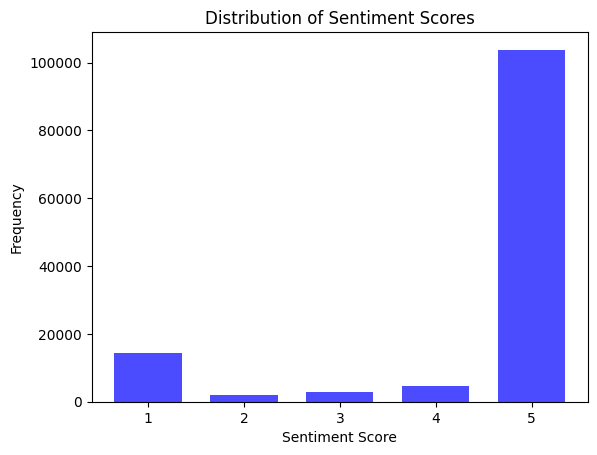

In [7]:
# Create histogram
plt.bar(scores.index, scores, color='blue', alpha=0.7, width=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [8]:
upvotes = datatext['upvotes'].value_counts().sort_index()
upvotes

upvotes
0       104964
1        10728
2         3630
3         1816
4         1116
         ...  
2127         1
2887         1
3078         1
3120         1
4314         1
Name: count, Length: 184, dtype: int64

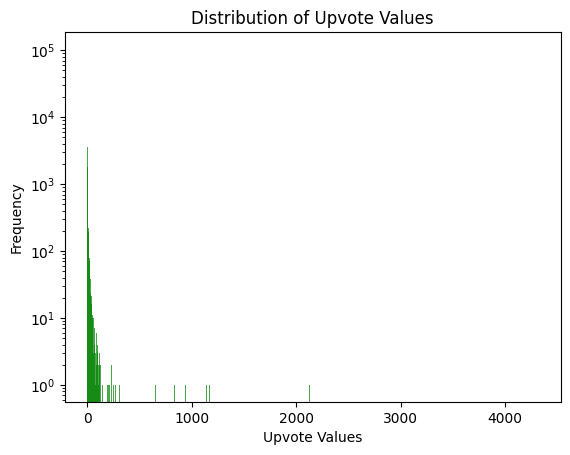

In [9]:
plt.bar(upvotes.index, upvotes, color='green', alpha=0.7, width=2)
plt.yscale('log')
plt.xlabel('Upvote Values')
plt.ylabel('Frequency')
plt.title('Distribution of Upvote Values')
plt.show()

In [10]:
# remove special characters
def preprocessor(text):
#   for word in Text(text).words:
#   if Detector(word).language.code != 'az':
#      re.sub(word, '', text)
#     print(word)
    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    
    return text

datatext['content'] = datatext['content'].apply(preprocessor)
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [11]:
#split to train and test sets
split_point = int(len(datatext) * 0.8)
train, test = datatext[ : split_point], datatext[split_point : ]

In [12]:
train

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
102025,əla,5,0
102026,çox yaxşıdır,5,0
102027,tamamilə pulsuz elanlar olsun,5,0
102028,cihazda root olduğu üçün tədbiq işləmir telefo...,1,2


In [13]:
test

,content,score,upvotes
102030,isime yariyir,5,0
102031,çox bəyəndim başka banklardan çox seçilir,5,0
102032,könüllü,5,0
102033,super,5,0
102034,bərbaddır yeniləyirəm yenidən yenilənmə istəyir,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [14]:
all_poly = []
all_spacy = []
all_nltk = []

# Load the spaCy EN language model
nlp = spacy.load("en_core_web_sm")


for sentence in train['content']:
    sentence = str(sentence)
    
    # Polyglot Tokenization
    polyglot_text = Text(sentence)
    polyglot_tokens = [word for word in polyglot_text.words]
    all_poly.append(polyglot_tokens)

    # NLTK Tokenization
    nltk_tokens = nltk.word_tokenize(sentence)
    all_nltk.append(nltk_tokens)

    # spaCy Tokenization
    spacy_doc = nlp(sentence)
    spacy_tokens = [token.text for token in spacy_doc]
    all_spacy.append(spacy_tokens)

    # Comparing the results
    """ print("Comparison:")
    print("Polyglot has", len(polyglot_tokens), "tokens:", polyglot_tokens)
    print("NLTK has", len(nltk_tokens), "tokens:", nltk_tokens)
    print("spaCy has", len(spacy_tokens), "tokens:", spacy_tokens) """

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete